http://www.mooc.ai/course/440/learn?lessonid=2401#lesson/2401

### CNN 
**conv - relu - 2x2 max pool - affine - relu - affine - softmax**<br>
### FNN
**{affine - [batch norm] - relu - [dropout]} x (L - 1) - affine - softmax**<br>

    where batch normalization and dropout are optional, and the {...} block is
    repeated L - 1 times. 

## Part 1 Full-connected Neural Network

架构同两层网络。<br>


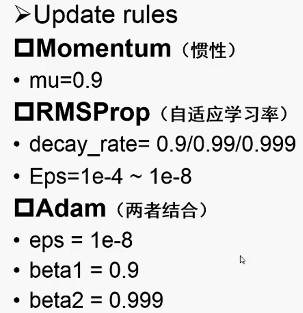

In [ ]:
#Momentum update
v=mu*v-learning_rate*dx #integrate velocity
x+=v #integrate position
#RMSProp update
cache=decay_rate*cache+(1-decay_rate)*dx**2
x+=-learning_rate*dx/(np.sqrt(cache)+eps)
#Adam update
m=beta1*m+(1-beta1)*dx
v=beta2*v+(1-beta2)*(dx**2)
x+=-learning_rate*m/(np.sqrt(v)+eps)

In [ ]:
def affine_forward(x, w, b):  
    out = None
    # Reshape x into rows
    N = x.shape[0]
    x_row = x.reshape(N, -1)         # (N,D)
    out = np.dot(x_row, w) + b       # (N,M)
    cache = (x, w, b)
    
    return out, cache

def affine_backward(dout, cache):   
    x, w, b = cache    
    dx, dw, db = None, None, None   
    dx = np.dot(dout, w.T)                       # (N,D)    
    dx = np.reshape(dx, x.shape)                 # (N,d1,...,d_k)   
    x_row = x.reshape(x.shape[0], -1)            # (N,D)    
    dw = np.dot(x_row.T, dout)                   # (D,M)    
    db = np.sum(dout, axis=0, keepdims=True)     # (1,M)    

    return dx, dw, db

## Part2 Batch Normalization

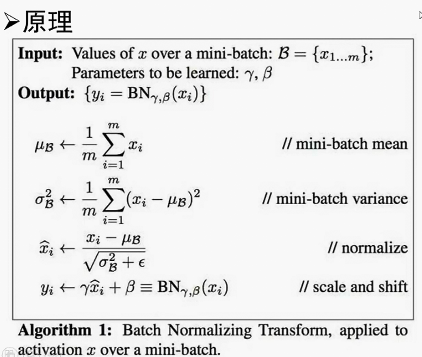

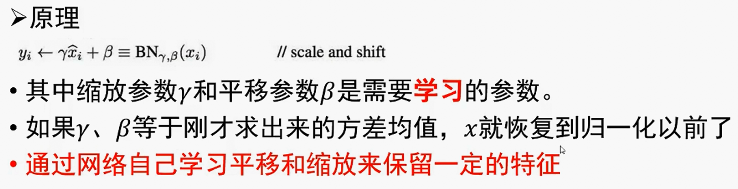

**减少权重shift，使得网络中有些神经元不会因为调参而变得无法激活**
同时,Batch Normalization具有把网络每一层的输出Y固定在一个变化范围的作用
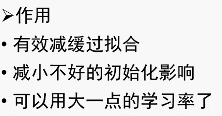
**在卷积层/全连接层后，激励函数前**

**BN缺点：<br>**
1、不适合直接用于RNN。原因在于RNN的Sequence是变长的，RNN是基于time step计算，效率低会占用过多内存。<br>
2、引入一定噪音，不适合与噪声敏感的强化学习和生成模型<br>
3、对小数据，少样本效果不一定会很好

## 池化<br>
池化大大减少特征的维度，减少过拟合的出现

In [ ]:
#前向训练
sample_mean=np.mean(x,axis=0)
sample_var=np.var(x,axis=0)
xhat=(x-sample_mean)/np.sqrt(sample_var+eps)
out=gamma*xhat+beta
cache=(gamma,x,sample_mean,sample_var,eps,xhat)

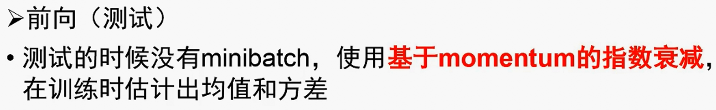

In [ ]:
#前向测试
### 训练计算
running_mean=momentum*runing_mean+(1-momentum)*sample_mean
running_var=momentum*running_var+(1-momentum)*sample_var
### 测试计算
a=gamma/np.sqrt(running_var+eps)
out=a*x+beta-a*running_mean

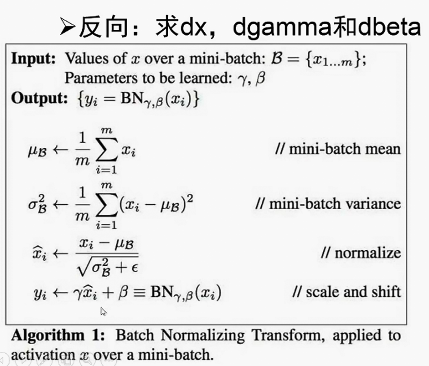

**后向传播**

In [ ]:
##第四个式子
dxhat=dout*gamma
dgamma=sum(dout*dxhat)
dbeta=sum(dout)

## 第三个式子
dmean2=sum(dxhat*-（var+eps）**(-1/2))
dvar=sum(dxhat*(x-mean)*(-0.5)*(var+eps)*(-3/2))
dx3=dxhat/sqrt(var+eps)

## 第二个式子
dmean1=dvar*sum(-2*m*(x-mean))=0
dx2=2*dvar*(x-mean)/m

## 第一个式子
dx1=dmean/m

## Part3 Dropout

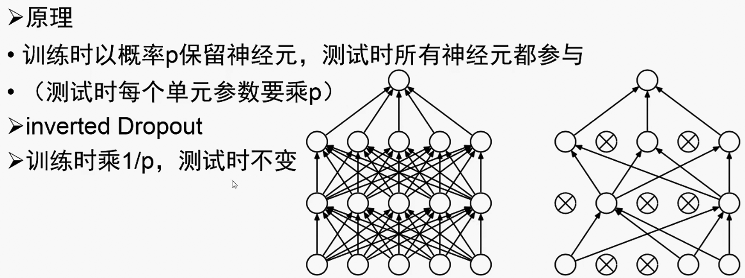

In [ ]:
# 前向训练
mask=(np.random.rand(x.shape[0],x.shape[1])<p)/p
out=x*mask

#前向测试 不变
out=x
#反向
dx=dout*mask #不参与更新


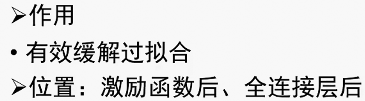

## Part4 Convolutional Networks

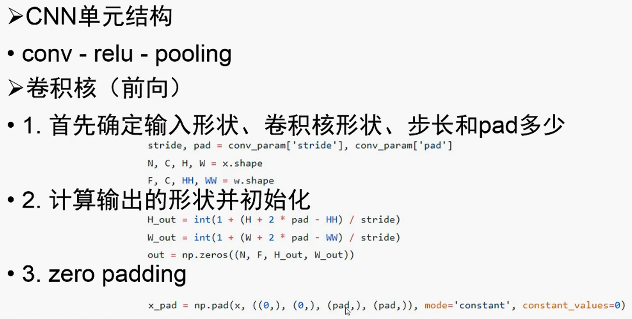

**CNN的卷积不做旋转不同于通信中的卷积**

### 卷积操作
**前向**

In [ ]:
## 只需确定对应区域
for i in range(H_out):
    for j in range(W_out):
        #跳stride
        x_padded_mask=x_pad[:,:,i*stride:i*stride+HH，j*stride:j*stride+WW] #(:,:,HH,WW)
## 卷积
for k in range(F):
    out[:,k,i,j]=np.sum(x_padded_mask*w[k,:,:,:],axis=(1,2,3))
    
## bias算上即可
out+=b[None,:,None,,None] #None 相当于 numpy.newaxis

**bias的处理和sum的细节 **
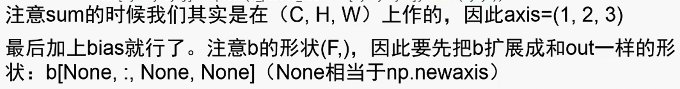

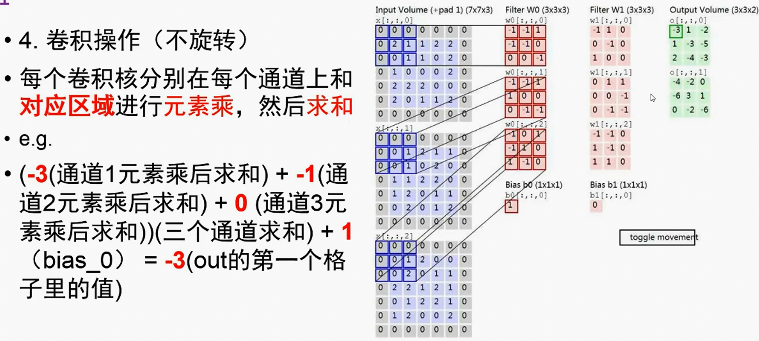

**后向**
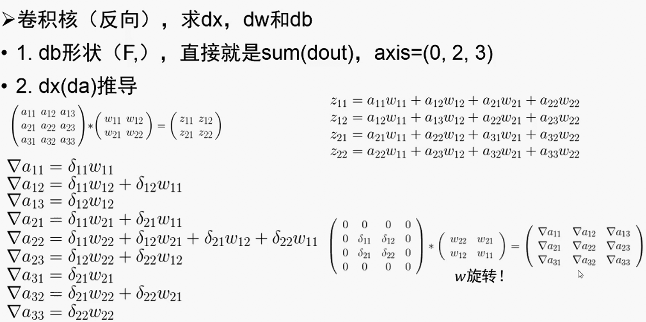

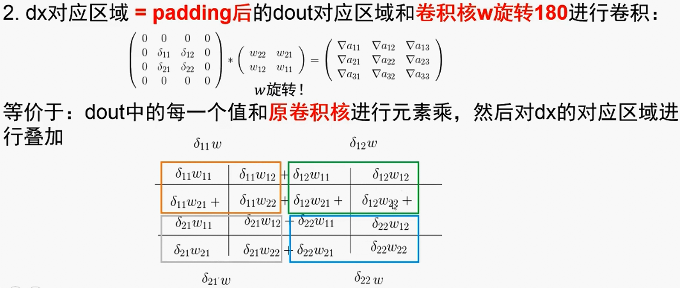

In [ ]:
for n in range(N):
    dx_pad[n,:,i*stride:i*stride+HH,j*stride:j*stride+WW]+=  ##dx对应区域叠加
    np.sum((dout[n,:,i,j])[:,None,None,None]*w,axis=0) #dout中的每一个值和原卷积核进行元素乘
    dx=dx_pad[:,:,pad:-pad,pad:-pad]
    

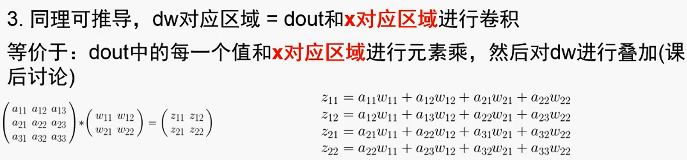

In [ ]:
for k in range(F):
    dw[k,:,:,:]+=np.sum((dout[:,k,i,j])[:,None,None,None]*x_padded_mask,axis=0)
    

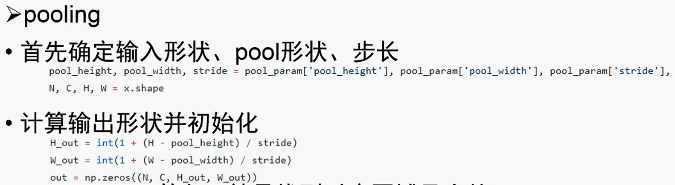

In [ ]:
# max_pooling前向，就是找对应区域最大的
for i in range(H_out):
    for j in  range(W_out)：
        #跳stride
        x_padded_mask=x[:,:,i*stride:i*stride+pool_height,j*stride:j*stride+pell_width] #(:,:,HH,WW)
        #findmax
        out[:,:,i,j]=np.max(x_padded_mask,axis=(2,3))

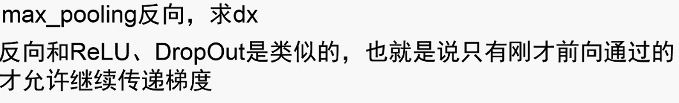

In [ ]:
# 核心：只有最大值的导数可以通过
#记录max在区域里的位置，用temp_binary_mask
max_mask=np.max(x_padded_mask,axis(2,3))
temp_binary_mask=(x_padded_mask==(max_mask)[:,:,None,None])

# dx等于dout和mask相乘
dx[:,:,i*stride:i*stride+pool_height,j*stride:j*stride+pool_width]+=temp_binary_mask*(dout[:,:,i,j])[:,:,None,None]
